### Download the Automobile data set
<b>Download link:</b> https://www.kaggle.com/toramky/automobile-dataset/discussion

<b>Summary:</b> Predict the price of a vehicle given other information about it

<b>Parameters: </b> <br />
1st argument is the location of the file  <br />
<b>sep</b> specifies the separator, which can also be expressed as a regular expression. Here we trim whitespaces around the commas<br />
<b>engine</b> represents the parsing engine. The values are <i>c</i> and <i>python</i>. The C engine is marginally faster but Python may offer more features 

In [1]:
import pandas as pd

In [2]:
automobile_data = pd.read_csv('datasets/Automobile_data.csv', 
                              sep=r'\s*,\s*', 
                              engine='python')

In [3]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Cleaning the dataset
* Dataset contains question marks(?) which we are going to replace it with nan first
* after replacing with nan we are going to drop those columns

In [4]:
import numpy as np

In [5]:
automobile_data = automobile_data.replace('?', np.nan)
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
automobile_data = automobile_data.dropna()

In [7]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


### Keeping only required features

In this example we will use only 4 features out of which 3 are categorical and 1 is numeric<br>
Our target variable is also numeric

<b>Features:</b>  make, fuel-type, body-style, horsepower<br>
<b>Target:</b> Price

In [8]:
col = ['make', 'fuel-type', 'body-style', 'horsepower']
automobile_features = automobile_data[col]

In [9]:
automobile_features.head()

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


#### The automobile price is our target variable

In [10]:
automobile_target = automobile_data[['price']]

In [11]:
automobile_target.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


### Converting datatypes of numeric data
You can see that price and horsepower are object types rather than integer or float

In [12]:
automobile_features['horsepower'].describe()

count     159
unique     48
top        68
freq       18
Name: horsepower, dtype: object

The SettingWithCopyWarning was created to flag potentially confusing "chained" assignments, but it flags some correct assignements too<br>
Hence to curb that warning we will disable chained assignment warning 

doc: http://pandas-docs.github.io/pandas-docs-travis/indexing.html#why-does-assignment-fail-when-using-chained-indexing

In [13]:
pd.options.mode.chained_assignment = None

In [14]:
automobile_features['horsepower'] = \
                pd.to_numeric(automobile_features['horsepower'])

In [15]:
automobile_features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

#### Similarly, we correct the datatype of target field

In [16]:
automobile_target['price'].describe()

count      159
unique     145
top       9279
freq         2
Name: price, dtype: object

In [17]:
automobile_target = automobile_target.astype(float)

In [18]:
automobile_target['price'].describe()

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

### Using Hot-encoding for non numeric datasets
All non-numeric fields can be made into usable features by applying one-hot-encoding


In [19]:
automobile_features = pd.get_dummies(automobile_features, 
                                     columns= ['make', 'fuel-type', 'body-style'])

In [20]:
automobile_features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,115,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,110,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,101,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
automobile_features.columns

Index(['horsepower', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon'],
      dtype='object')

### Scaling the continuous values
Horse power is continuous number hence it should be scalled before feeding in any model

In [22]:
from sklearn import preprocessing

In [23]:
automobile_features[['horsepower']] = \
                preprocessing.scale(automobile_features[['horsepower']])

In [24]:
automobile_features[['horsepower']].head()

,horsepower
3,0.201279
4,0.625812
6,0.462530
8,1.442223
10,0.168622


#### Create training and test data using train_test_split

In [25]:
from sklearn.model_selection import train_test_split

#### Split the data into two chunks - 80% for training and 20% for testing 
We can then check the accuracy of our model on the test data


In [26]:
X_train, x_test, Y_train, y_test = train_test_split(automobile_features,
                                                    automobile_target,
                                                    test_size=0.2,
                                                    random_state=0)

#### Converting data in pytorch tensors

In [27]:
import torch

In [28]:
dtype = torch.float

In [29]:
X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
x_test_tensor = torch.tensor(x_test.values, dtype = dtype)

Y_train_tensor = torch.tensor(Y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [30]:
X_train_tensor.shape

torch.Size([127, 26])

In [31]:
Y_train_tensor.shape

torch.Size([127, 1])

#### Define the parameters for the neural network
* <b>inp</b> sets the input size to 26 to match the shape of the X_train_tensor. With the one-hot-encoding, we have multiple columns in our X data
* <b>out</b> will be used to set the size of the output from the neural network. We only predict a single price for each car, so this will be 1
* <b>hid</b> is used to set the number of hidden layers in our neural network
* <b>loss_fn</b> is MSELoss since we're performing a linear regression
* <b>learning_rate</b> is set to 0.0001

In [32]:
inp = 26
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

<b>nn.Sequential:</b>
Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output. Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias.

<b>nn.Linear: </b> Applies a linear transformation to the incoming data: y=Ax+b<br>
parameters:<br>
in_features – size of each input sample
out_features – size of each output sample
bias – If set to False, the layer will not learn an additive bias. Default: True

<b>Sigmoid : </b>Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))

#### Creating model using nn.Sequential(..)

In [33]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out),
)

#### Training our model

Foward Pass:
* Predicting Y with input data X

Finding Loss:
* Finding difference between Y_train_tensor and Y_pred using MSEloss function defined above


Back Propogation:
* starting with zero gradients before back propogation
* back propogation is done by simply loss.backward() function

Manually updating model parameters
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* model.parameter() returns all the weights and biases of parameters
* reducing weight with multiple of learning rate and gradient

In [34]:
for iter in range(10000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)

    if iter % 1000 ==0:
        print(iter, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 168076784.0
1000 4310980.0
2000 2420343.75
3000 1719288.25
4000 1462870.0
5000 1346655.125
6000 1248581.125
7000 1191773.375
8000 1112021.0
9000 1063575.125


#### Using our model for predictions
We pick one of the automobiles from the test data set for predictions

In [35]:
sample = x_test.iloc[23]
sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
Name: 186, dtype: float64

#### We convert these features to a Pytorch tensor

In [36]:
sample_tensor = torch.tensor(sample.values, 
                             dtype = dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,
         0.0000,  0.0000,  0.0000,  1.0000,  0.0000])

#### Compare the actual and predicted values for this automobile's price
The predicted price very close to its actual price

In [37]:
y_pred = model(sample_tensor)
print("Predicted price of automobile is : ", int(y_pred.item()))
print("Actual price of automobile is : ", int(y_test.iloc[23]))

Predicted price of automobile is :  8094
Actual price of automobile is :  8495


#### Performing predictions on the entire test set
We get the list of predicted values in a tensor

In [38]:
y_pred_tensor = model(x_test_tensor)

#### The tensor is converted to a numpy array

In [39]:
y_pred = y_pred_tensor.detach().numpy()

#### Plot a graph of the predicted values against the actual ones 
The good news is there appears to be a strong positive correlation 

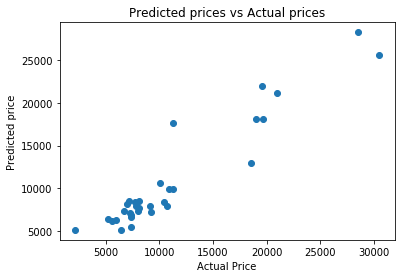

In [46]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")

plt.title("Predicted prices vs Actual prices")
plt.show()

#### Saving our trained model
Pytorch allows our model to be saved. The parameters to the torch.save() method are the model to be saved followed by the directory path where it should be saved

In [41]:
torch.save(model, 'my_model')

#### Loading  an already saved model
We can load a saved model using the torch.load() method

In [42]:
saved_model = torch.load('my_model')

#### We now use the saved model to perform predictions
It is now used exactly how we used the model before it was saved

In [43]:
y_pred_tensor = saved_model(x_test_tensor)

In [44]:
y_pred = y_pred_tensor.detach().numpy()

#### This time we perform a closer comparison of the actual and predicted values
We do this by plotting separate lines for the actual and predicted values

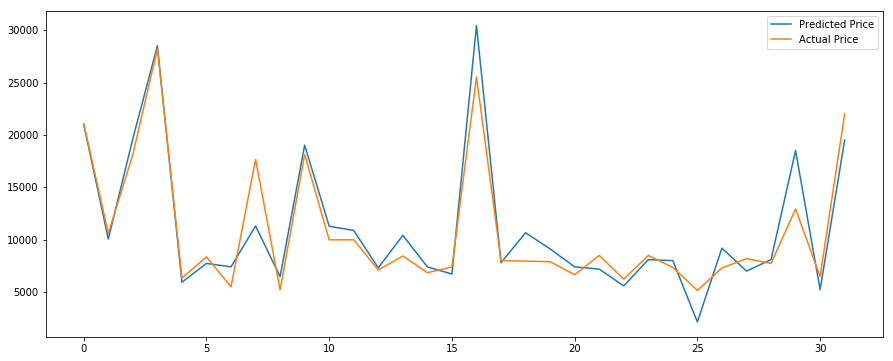

In [45]:
plt.figure(figsize=(15,6))

plt.plot(y_pred, label='Predicted Price')
plt.plot(y_test.values, label='Actual Price')

plt.legend()
plt.show()